# Libraries

In [42]:
import pandas as pd
import nltk

# Import data

In [43]:
df = pd.read_csv('north_south_korea_handshake.csv')
df = df.rename(columns=lambda x: x.strip())
df.head()

,title,publication,url,content
0,Korean leaders bond over handshakes and 'a lot...,theguardian,https://www.theguardian.com/world/2018/apr/27/...,Korea summit’s positive mood appears to break ...
1,A Historic Handshake,wilsoncenter,https://www.wilsoncenter.org/article/historic-...,There’s no denying it: This was a historic han...
2,Watch the North and South Korean leaders’ hist...,cnbc,https://www.cnbc.com/2018/04/27/watch-the-nort...,The leaders of North and South Korea made hist...
3,North Korea’s leader steps across border for a...,vox,https://www.vox.com/2018/4/26/17288108/north-k...,Kim Jong Un walked across the border into Sout...
4,North and South Korea: A Handshake that Shook ...,globalresearch,https://www.globalresearch.ca/north-and-south-...,One of the memorable events of the Summit of M...


**Tokenize sentences**

In [44]:
df_token = df.copy()
df_token['sent_token'] = df_token.apply(lambda row: nltk.sent_tokenize(row['content']),axis=1)

In [45]:
df_token.head()

,title,publication,url,content,sent_token
0,Korean leaders bond over handshakes and 'a lot...,theguardian,https://www.theguardian.com/world/2018/apr/27/...,Korea summit’s positive mood appears to break ...,[Korea summit’s positive mood appears to break...
1,A Historic Handshake,wilsoncenter,https://www.wilsoncenter.org/article/historic-...,There’s no denying it: This was a historic han...,[There’s no denying it: This was a historic ha...
2,Watch the North and South Korean leaders’ hist...,cnbc,https://www.cnbc.com/2018/04/27/watch-the-nort...,The leaders of North and South Korea made hist...,[The leaders of North and South Korea made his...
3,North Korea’s leader steps across border for a...,vox,https://www.vox.com/2018/4/26/17288108/north-k...,Kim Jong Un walked across the border into Sout...,[Kim Jong Un walked across the border into Sou...
4,North and South Korea: A Handshake that Shook ...,globalresearch,https://www.globalresearch.ca/north-and-south-...,One of the memorable events of the Summit of M...,[One of the memorable events of the Summit of ...


In [46]:
df_token.iloc[0]['sent_token'][1:5]

['When the two men shook hands, it was as if old friends were catching up after a long separation, and 65 years of animosity and occasional spilt blood seemed to wash away in an instant.',
 'At least that is how it appeared as the world’s newest double act – the North Korean leader, Kim Jong-un, and the South Korean president, Moon Jae-in – met at the world’s most militarised border.',
 'There was no enmity as the two greeted each other at a uniquely peaceful point on the 155-mile (250km) border, and both men took great pains to ensure their meeting produced a positive appearance.',
 'Moments after Kim crossed into the South, Moon asked when he would be allowed to visit the North and in an unscripted moment the two held hands and hopped over a low concrete barrier that marks the frontier.']

*remove the double breaking line problem (\n\n)*

In [47]:
for index in df_token.index:
    sent_list = []
    for sent in df_token.loc[index, 'sent_token']:
        sent_list = sent_list + sent.splitlines()
    sent_list = list(filter(None, sent_list))
    df_token.loc[index, 'sent_token'] = sent_list

In [48]:
df_token.loc[0, 'sent_token']

['Korea summit’s positive mood appears to break 65 years of North and South animosity.',
 'When the two men shook hands, it was as if old friends were catching up after a long separation, and 65 years of animosity and occasional spilt blood seemed to wash away in an instant.',
 'At least that is how it appeared as the world’s newest double act – the North Korean leader, Kim Jong-un, and the South Korean president, Moon Jae-in – met at the world’s most militarised border.',
 'There was no enmity as the two greeted each other at a uniquely peaceful point on the 155-mile (250km) border, and both men took great pains to ensure their meeting produced a positive appearance.',
 'Moments after Kim crossed into the South, Moon asked when he would be allowed to visit the North and in an unscripted moment the two held hands and hopped over a low concrete barrier that marks the frontier.',
 'The good-natured atmosphere was the best both sides could have hoped for.',
 'Kim wanted to project the ima

## test TextRank

In [49]:
import json

data = {}
data['id'] = 1
data['text'] = df_token.loc[0, 'content']
with open('test.json', 'w') as outfile:
    json.dump(data, outfile)

In [50]:
import pytextrank
import sys

path_stage0 = "test.json"
path_stage1 = "o1.json"

with open(path_stage1, 'w') as f:
    for graf in pytextrank.parse_doc(pytextrank.json_iter(path_stage0)):
        f.write("%s\n" % pytextrank.pretty_print(graf._asdict()))
        # to view output in this notebook
#         print(pytextrank.pretty_print(graf))

In [51]:
path_stage1 = "o1.json"
path_stage2 = "o2.json"

graph, ranks = pytextrank.text_rank(path_stage1)
pytextrank.render_ranks(graph, ranks)

with open(path_stage2, 'w') as f:
    for rl in pytextrank.normalize_key_phrases(path_stage1, ranks):
        f.write("%s\n" % pytextrank.pretty_print(rl._asdict()))
        # to view output in this notebook
#         print(pytextrank.pretty_print(rl))

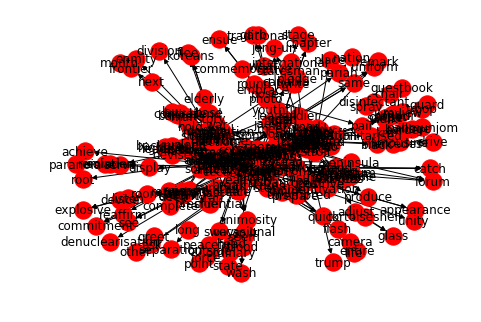

In [52]:
import networkx as nx
import pylab as plt

nx.draw(graph, with_labels=True) 
plt.show()

In [53]:
path_stage1 = "o1.json"
path_stage2 = "o2.json"
path_stage3 = "o3.json"

kernel = pytextrank.rank_kernel(path_stage2)

with open(path_stage3, 'w') as f:
    for s in pytextrank.top_sentences(kernel, path_stage1):
        f.write(pytextrank.pretty_print(s._asdict()))
        f.write("\n")
        # to view output in this notebook
#         print(pytextrank.pretty_print(s._asdict()))

In [54]:
path_stage2 = "o2.json"
path_stage3 = "o3.json"

phrases = ", ".join(set([p for p in pytextrank.limit_keyphrases(path_stage2, phrase_limit=12)]))
sent_iter = sorted(pytextrank.limit_sentences(path_stage3, word_limit=150), key=lambda x: x[1])
s = []

for sent_text, idx in sent_iter:
    s.append(pytextrank.make_sentence(sent_text))

graf_text = " ".join(s)
print("**excerpts:** %s\n\n**keywords:** %s" % (graf_text, phrases,))

**excerpts:** Korea summit ’s positive mood appears to break 65 years of North and South animosity. At least that is how it appeared as the world ’s newest double act – the North Korean leader, Kim Jong-un, and the South Korean president, Moon Jae-in – met at the world ’s most militarised border. In the face of the South Korean military band Kim was noticeably nervous, breathing heavily while standing stiff as Moon saluted his troops. The North Korean leader ’s eccentricities were also on display, serving as a reminder of his isolation and paranoia. “ The mood, atmosphere and chemistry was good between the two leaders, you could tell they both really wanted a good outcome, ” said Duyeon Kim, a senior fellow at the Korean Peninsula Future Forum.

**keywords:** north korean leader, kim jong-un, korea summit, south korean president, kim, sides, border, elderly north koreans, peace, positive mood, moon, south korean military band kim, north


**Modify PyTextRank source code to get Top Ranking Sentences without save data to json files**

In [55]:
import xang_pytextrank as pyt

phrase, word = pyt.top_keywords_sentences(df_token.loc[0, 'content'], phrase_limit=15, sent_word_limit=200)
print('Keywords:',word)
print('Sentences:', phrase)

Keywords: north korean leader, kim jong-un, korea summit, south korean president, kim, low concrete barrier, meeting, sides, border, south animosity, elderly north koreans, peace, positive mood, moon, south korean military band kim, north
Sentences: ['Korea summit ’s positive mood appears to break 65 years of North and South animosity.', 'At least that is how it appeared as the world ’s newest double act – the North Korean leader, Kim Jong-un, and the South Korean president, Moon Jae-in – met at the world ’s most militarised border.', 'Moments after Kim crossed into the South, Moon asked when he would be allowed to visit the North and in an unscripted moment the two held hands and hopped over a low concrete barrier that marks the frontier.', 'In the face of the South Korean military band Kim was noticeably nervous, breathing heavily while standing stiff as Moon saluted his troops.', 'The North Korean leader ’s eccentricities were also on display, serving as a reminder of his isolation 

In [61]:
def get_top_words_sentences(text, option):
    sentence, word = pyt.top_keywords_sentences(text, phrase_limit=15, sent_word_limit=200)
    if option == "word":
        return word
    if option == "sentence":
        return sentence

In [63]:
df_token['top_keywords'] = df_token.apply(lambda row: get_top_words_sentences(row['content'], "word"),axis=1)
df_token['top_sentences'] = df_token.apply(lambda row: get_top_words_sentences(row['content'], "sentence"),axis=1)

In [65]:
df_token.head()

,title,publication,url,content,sent_token,top_sentences,top_keywords
0,Korean leaders bond over handshakes and 'a lot...,theguardian,https://www.theguardian.com/world/2018/apr/27/...,Korea summit’s positive mood appears to break ...,[Korea summit’s positive mood appears to break...,[Korea summit ’s positive mood appears to brea...,"north korean leader, kim jong-un, korea summit..."
1,A Historic Handshake,wilsoncenter,https://www.wilsoncenter.org/article/historic-...,There’s no denying it: This was a historic han...,[There’s no denying it: This was a historic ha...,[It ’s the first time the leaders of North Kor...,"kim jong un, north korean flags, kim, korean w..."
2,Watch the North and South Korean leaders’ hist...,cnbc,https://www.cnbc.com/2018/04/27/watch-the-nort...,The leaders of North and South Korea made hist...,[The leaders of North and South Korea made his...,"[The meeting, which comes after more than five...","missile tests, bilateral relations, south kore..."
3,North Korea’s leader steps across border for a...,vox,https://www.vox.com/2018/4/26/17288108/north-k...,Kim Jong Un walked across the border into Sout...,[Kim Jong Un walked across the border into Sou...,[Kim Jong Un walked across the border into Sou...,"north korean leader, kim jong un, south korea,..."
4,North and South Korea: A Handshake that Shook ...,globalresearch,https://www.globalresearch.ca/north-and-south-...,One of the memorable events of the Summit of M...,[One of the memorable events of the Summit of ...,[The Joint Declaration-6.15 was produced at th...,"north korean leader, kim jong-un, 3-party talk..."


**Mix all articles**

In [75]:
sentences = []
for sent in df_token['top_sentences']:
    sentences = sentences + sent
text = " ".join(sentences)

In [77]:
sent, word = pyt.top_keywords_sentences(text, phrase_limit=15, sent_word_limit=200)
print('Top_Keywords:',word)
print('Top_Sentences:', sent)

Top_Keywords: north korean leader, kim jong-un, korea summit, north korean flags, kim, kim jong un, south, moon, north koreans, korean, korea, korean peninsula future forum, south korean president, south korean military band kim, south animosity, north korea
Top_Sentences: ['Kim took those few historic steps ahead of a major summit with South Korean president Moon Jae-in.', 'South and North Korea confirmed the common goal of realizing, through complete denuclearization, a nuclear free Korean peninsula.', 'South and North Korea agreed to actively seek the support and cooperation of the international community for the denuclearization of the Korean peninsula.', "North Korean leader Kim Jong Un's summit with South Korean President Moon Jae-in has sparked a new trend: tourists are mimicking the historic handshake between the two leaders.", 'Not since the 1950- 53 Korean War had a North Korean leader set foot on South Korean soil.', 'PYEONGCHANG, South Korea', 'The South Korean president, M